In [12]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_hdf('..//data//model//data_to_model.h5')
blocks = pd.read_csv('..//data//census//tl_2010_06075_tabblock10.csv')

data['HH_income'] = data['HH_income'].replace('-',0)
data['HH_income'] = data['HH_income'].replace('250,000+',250000).astype(int)

In [13]:
blocks_id = blocks.loc[:,[
    
    'GEOID10',
    'INTPTLAT10',
    'INTPTLON10'
]]

blocks_id = blocks_id[blocks_id['INTPTLAT10']<37.825]
blocks_id = blocks_id[blocks_id['INTPTLON10']>-122.7]

In [14]:
num_clus = 1809
km = KMeans(n_clusters=num_clus)
km = km.fit(blocks_id[['INTPTLAT10','INTPTLON10']])
blocks_id['new_block_group'] = km.predict(blocks_id[['INTPTLAT10','INTPTLON10']])

In [15]:
data_clus = data.merge(blocks_id[['GEOID10','new_block_group']], left_on='block_fips', right_on='GEOID10')

data_clus = data_clus.groupby(['new_block_group', 'Opened_rnd']).mean().reset_index()
data_clus['poop'] = np.where(data_clus['poop']>0, 1, 0)

In [16]:
data_clus.to_hdf('..//data//model//data_model_clus.h5', key='xyz', complib='blosc')

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


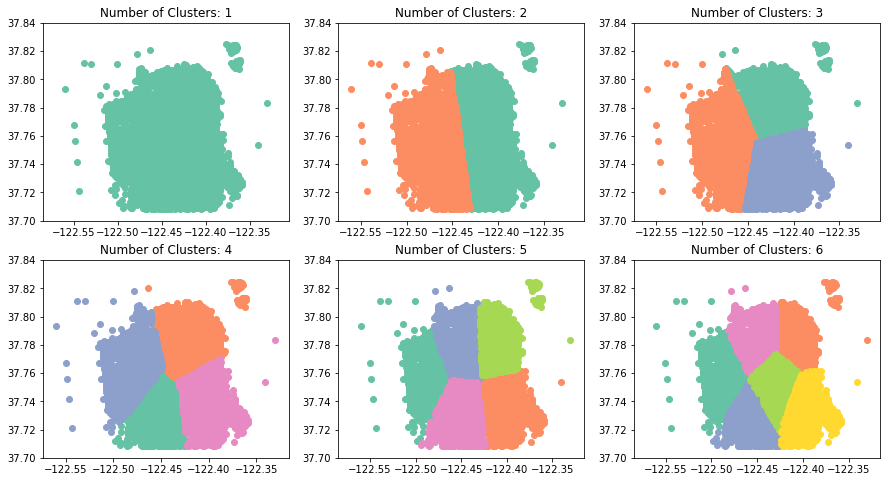

In [17]:
plt.figure(figsize=(15,8))

for i in range(1,7):

    # create clusters
    num_clus = i
    km = KMeans(n_clusters=num_clus)
    km = km.fit(blocks_id[['INTPTLAT10','INTPTLON10']])

    # assign new cluster labels
    blocks_id['new_block_group'] = km.predict(blocks_id[['INTPTLAT10','INTPTLON10']])

    # dictionary for different colors
    color_dict = {

        0:'#66c2a5',
        1:'#fc8d62',
        2:'#8da0cb',
        3:'#e78ac3',
        4:'#a6d854',
        5:'#ffd92f'
    }

    # plot the different clusters
    for cluster in range(0,num_clus):
        data_use = blocks_id[blocks_id['new_block_group']==cluster]
        plt.subplot(2,3,i)
        plt.scatter(data_use['INTPTLON10'],
                    data_use['INTPTLAT10'],
                   c=color_dict[cluster])
        plt.title('Number of Clusters: {}'.format(i))
        plt.ylim((37.7,37.84))

In [18]:
len(blocks_id['GEOID10'].unique())/6

1226.8333333333333

In [19]:
data_clus['poop'].mean()

0.01918271279686955

In [20]:
clus_test = [452,517,603,723,904,1206,1809,3619]